### 1    Perform an exploratory data analysis
	- What are the abnormalities in the data?
	- Are there any interesting, perhaps unexpected relationships to be found?

In [1]:
# Load necessary packages
# Basi
import pandas as pd # dataframe manipulation
import matplotlib.pyplot as plt # plotting graphs
import numpy as np # efficient calculation
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso # # Lasso regression to extract key features

# Accuracy related
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report # confusion matrix reporting details
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Algorithms 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Regression algo

import statsmodels.formula.api as smf 
from sklearn import linear_model

In [2]:
# Read CSV as DataFrame df
df = pd.read_csv('train_data.csv') # Path to the input file
# Glimpse of data
print(df.head())

    radius_0  texture_0  perimeter_0   radius_1  texture_1  perimeter_1  \
0  19.858394  27.204437   136.324256  22.683290  32.802578   119.523841   
1  14.182069  15.754730    80.916983  14.043753  30.094704    94.911073   
2  25.380268  21.291553   152.281062  23.852166  46.237931          NaN   
3  11.835961  17.820702    72.178523  11.260258  44.805167          NaN   
4  14.875600  17.534187    98.545830  14.380683  26.190447    89.712492   

    radius_2      texture_2  perimeter_2  age treatment_date diagnose_date  \
0  21.477052  27.3070874472    82.366936   44     2006-06-03    2005-10-23   
1  15.012329  17.8551305385   103.078286   59     2004-02-22    2007-08-20   
2  28.563252  21.0971528265   143.367792   37     2006-01-06    2004-08-07   
3  12.082749  16.4992370844    65.920413   51     2003-04-14    2005-06-16   
4  12.930685  19.8566873539   108.380754   21     2004-06-21    2002-11-27   

   cancer_type  
0            0  
1            1  
2            0  
3           

In [3]:
df.cancer_type.value_counts() # Not completely balanced, typical dataset ;)
# So, use stratefied while training

1    250
0    148
Name: cancer_type, dtype: int64

In [4]:
# df['treatment_date'] = pd.to_datetime(df['treatment_date'])
# df["treatment_month"] = df["treatment_date"].apply(lambda row: row.month)
# df["treatment_year"] = df["treatment_date"].apply(lambda row: row.year)
# df["treatment_day"] = df["treatment_date"].apply(lambda row: row.day)
# df['diagnose_date'] = pd.to_datetime(df['diagnose_date'])
# df["diagnose_month"] = df["diagnose_date"].apply(lambda row: row.month)
# df["diagnose_year"] = df["diagnose_date"].apply(lambda row: row.year)
# df["diagnose_day"] = df["diagnose_date"].apply(lambda row: row.day)
df = df.drop("diagnose_date", axis=1)
df = df.drop("treatment_date", axis=1)
df = df.drop("perimeter_0", axis = 1) # as it is highly correlated with perimeter_0 == radius_2

In [5]:
# Inspect data types
print(df.dtypes) 
# textuture_2 type mismatch because it had characters such as xx. So missing values
# both dates need to be changed to date or some meaningful features

radius_0       float64
texture_0      float64
radius_1       float64
texture_1      float64
perimeter_1    float64
radius_2       float64
texture_2       object
perimeter_2    float64
age              int64
cancer_type      int64
dtype: object


In [6]:
# Check for missing values
print(df.describe()) # there are missing values in radius_1 and perimeter_1
# Since all input values are not between ~0 to ~1, 
# standardization required
print(df.isna().sum())

         radius_0   texture_0    radius_1   texture_1  perimeter_1  \
count  398.000000  398.000000  343.000000  398.000000   264.000000   
mean    21.303711   18.957554   14.123575   30.417222    94.086379   
std     49.987646    6.243499    3.780636   15.027855    27.314466   
min      6.401956  -17.243202    5.752395    2.395868    43.444930   
25%     11.693885   14.581364   11.600838   19.898062    75.188880   
50%     13.468170   18.238742   13.385789   30.897762    90.054613   
75%     16.323024   22.494291   16.051640   42.555657   106.085670   
max    561.311068   40.064462   29.645166   55.820612   227.162938   

         radius_2  perimeter_2         age  cancer_type  
count  398.000000   398.000000  398.000000   398.000000  
mean    14.134922   127.222422   39.876884     0.628141  
std      3.748146    49.097558   13.427196     0.483909  
min      7.079847    44.918942   18.000000     0.000000  
25%     11.573592    84.123724   28.000000     0.000000  
50%     13.333610   1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f764f061cf8>]],
      dtype=object)

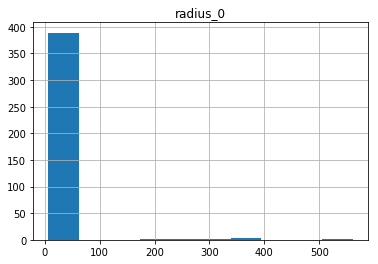

In [7]:
df.hist(column='radius_0')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f764efc7a20>]],
      dtype=object)

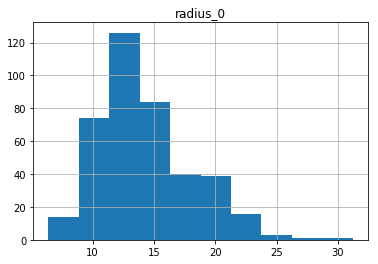

In [8]:
df['radius_0'][df['radius_0'] > 100] = df['radius_0'].mean()
df.hist(column = "radius_0")

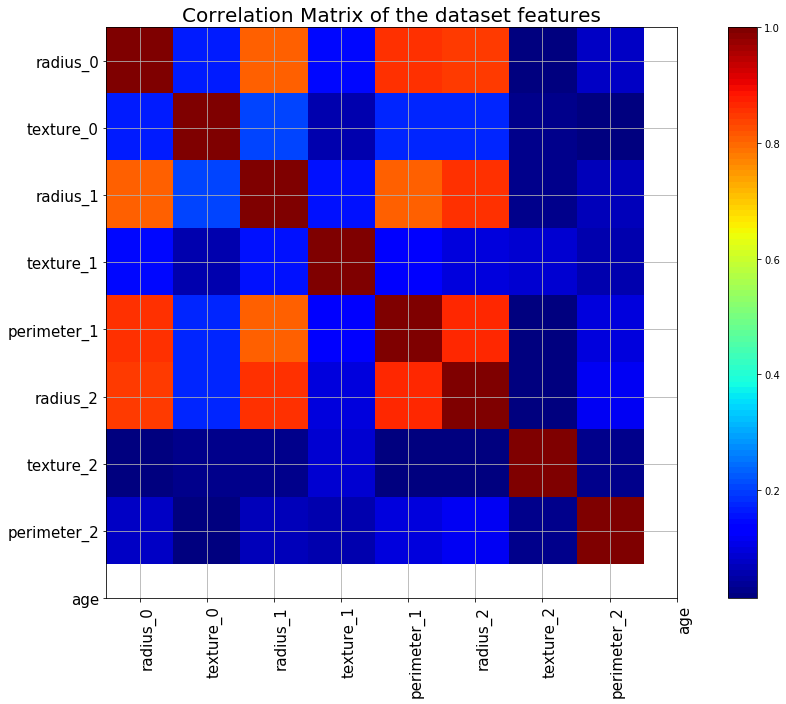

In [9]:
# # Any correlation between main variables 
# pd.plotting.scatter_matrix(df.loc[:,["radius_0","texture_0","perimeter_0",
#                                     "radius_1","texture_1","perimeter_1",
#                                     "radius_2","texture_2","perimeter_2"]], c = y, figsize = [8, 8],
# s=150, marker = 'D')

# Bivariate Analysis
# Make a Features Correlation Matrix of the WBCD features
# Readapted from AN6U5

def features_correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax1 = fig.add_subplot(111)
    
    cmap = cm.get_cmap('jet', 100)
    
    # interpolation='nearest' simply displays an image without 
    # trying to interpolate between pixels if the display 
    # resolution is not the same as the image resolution
    # The correlation is returned in absolute values:
    cax = ax1.imshow(df.corr().abs(), interpolation="nearest", \
                     cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation Matrix of the dataset features',fontsize=20)
    labels=list(df.columns)
    
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    
    ax1.set_xticklabels(labels,fontsize=15,\
              horizontalalignment="left", rotation='vertical')
    
    ax1.set_yticklabels(labels,fontsize=15)
    
    # Add a colorbar
    fig.colorbar(cax, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, \
                             0.2, 0.4, 0.6, 0.8, 1])
    plt.show()


# Drop the Outcome column from Df and copy it into df_features
df_features = df.drop(df.columns[-1],axis=1)
# Run the correlation_matrix function, using df_features as argument
features_correlation_matrix(df_features)

## Substitude for missing values
- texture_2, radius_1 and perimeter_1

,radius_0,texture_0,radius_1,texture_1,perimeter_1,radius_2,texture_2,perimeter_2,age,cancer_type
14,9.205499,-17.243202,8.932095,39.357782,NaN,9.056063,28.0304832259,138.15745,63,1


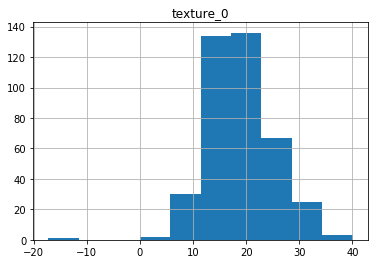

In [10]:
df.hist(column='texture_0')
df[df.texture_0 < 0] # Outliers

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f764a5a3588>]],
      dtype=object)

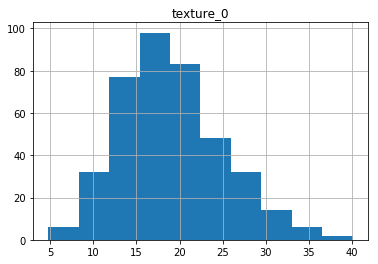

In [11]:
df['texture_0'][df['texture_0'] < 0] = df['texture_0'].mean()
df.hist(column = "texture_0")

,radius_0,texture_0,radius_1,texture_1,perimeter_1,radius_2,perimeter_2,age,cancer_type
count,398.000000,398.000000,343.000000,398.000000,264.000000,398.000000,398.000000,398.000000,398.000000
mean,14.233279,19.048511,14.123575,30.417222,94.086379,14.134922,127.222422,39.876884,0.628141
std,3.780206,5.972603,3.780636,15.027855,27.314466,3.748146,49.097558,13.427196,0.483909
min,6.401956,4.772917,5.752395,2.395868,43.444930,7.079847,44.918942,18.000000,0.000000
25%,11.693885,14.604272,11.600838,19.898062,75.188880,11.573592,84.123724,28.000000,0.000000
50%,13.468170,18.246521,13.385789,30.897762,90.054613,13.333610,129.992697,39.000000,1.000000
75%,16.323024,22.494291,16.051640,42.555657,106.085670,16.093900,169.538170,50.000000,1.000000
max,31.216269,40.064462,29.645166,55.820612,227.162938,28.563252,214.192377,64.000000,1.000000


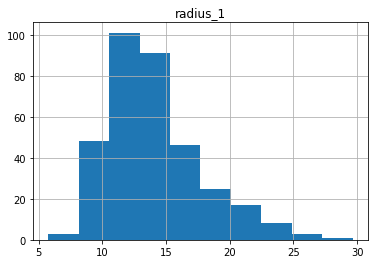

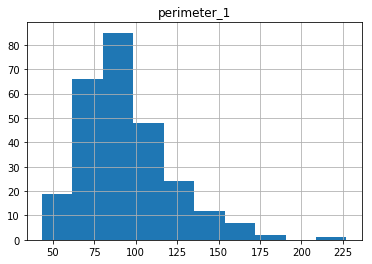

In [12]:
# Histogram
df.hist(column='radius_1')
df.hist(column='perimeter_1')
df.describe()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


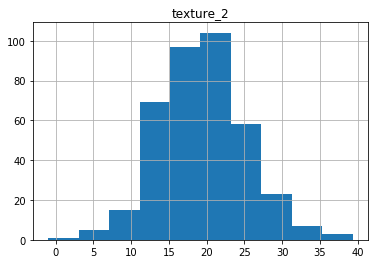

In [13]:
temp = df.loc[(df.texture_2 != "xx"),]#.sum()
temp.texture_2 = temp.texture_2.astype(float)
temp.hist(column = "texture_2")
temp.describe() # Replace with mean 
texture_2_mean = temp.texture_2.mean()

In [14]:
df.texture_2.replace(to_replace=dict(xx= texture_2_mean), inplace=True)
df.texture_2 = df.texture_2.astype(float)

In [15]:
# Replace with mean
df = df.fillna(df.mean())#df.median())#an())
#Impute the values using scikit-learn SimpleImpute Class
# from sklearn.impute import SimpleImputer
# imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
# imp_mean.fit(train)
# imputed_train_df = imp_mean.transform(train)

In [16]:
# Cross check for data types and missing values
df.describe()
#df.dtypes

,radius_0,texture_0,radius_1,texture_1,perimeter_1,radius_2,texture_2,perimeter_2,age,cancer_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.233279,19.048511,14.123575,30.417222,94.086379,14.134922,19.459098,127.222422,39.876884,0.628141
std,3.780206,5.972603,3.508995,15.027855,22.231836,3.748146,5.684066,49.097558,13.427196,0.483909
min,6.401956,4.772917,5.752395,2.395868,43.444930,7.079847,-0.966998,44.918942,18.000000,0.000000
25%,11.693885,14.604272,11.841313,19.898062,82.575868,11.573592,15.711594,84.123724,28.000000,0.000000
50%,13.468170,18.246521,14.060150,30.897762,94.086379,13.333610,19.459098,129.992697,39.000000,1.000000
75%,16.323024,22.494291,15.370723,42.555657,97.183260,16.093900,22.807407,169.538170,50.000000,1.000000
max,31.216269,40.064462,29.645166,55.820612,227.162938,28.563252,39.331864,214.192377,64.000000,1.000000


In [27]:
X = df.drop("cancer_type",axis= 1)
y = df.cancer_type
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y, shuffle = True)
X_train
X_test.shape

(120, 9)

### Feature scaling

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


### Visual EDA

### 2    Create a model for predicting the cancer_type
	- Select an appropriate model and keep its complexity reasonable (number of used features, etc.)

In [29]:
#Using Logistic Regression Algorithm to the Training Set
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr
print('Confusion matrix for Logistic regression \n {}'.format(cm_lr))
print(f'Logistic Regression Accuracy {lr.score(X_test,y_test)}  \n')

#Using SVC method of svm class to use Kernel SVM Algorithm
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, y_train)
y_pred_svc_rbf = svc_rbf.predict(X_test)
cm_svc_rbf = confusion_matrix(y_test, y_pred_svc_rbf)
cm_svc_rbf
print('Confusion matrix for SVM svc \n {}'.format(cm_svc_rbf))
print(f'SVM svc Accuracy {svc_rbf.score(X_test,y_test)} \n')

#Using SVC method of svm class to use Support Vector Machine Algorithm

svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train, y_train)
y_pred_svc_lin = svc_lin.predict(X_test)
cm_svc_lin = confusion_matrix(y_test, y_pred_svc_lin)
cm_svc_lin
print('Confusion matrix for SVM svm \n {}'.format(cm_svc_lin))
print(f'SVM Accuracy {svc_lin.score(X_test,y_test)}  \n')

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt
print('Confusion matrix for Decision tree \n {}'.format(cm_dt))
print(f'Decision tree Accuracy {dt.score(X_test,y_test)} \n')

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf
print('Confusion matrix for RandomForestClassifier \n {}'.format(cm_rf))
print(f'RandomForestClassifier Accuracy {rf.score(X_test,y_test)}')
print(classification_report(y_test, y_pred_rf))

Confusion matrix for Logistic regression 
 [[38  7]
 [ 9 66]]
Logistic Regression Accuracy 0.8666666666666667  

Confusion matrix for SVM svc 
 [[34 11]
 [ 5 70]]
SVM svc Accuracy 0.8666666666666667 

Confusion matrix for SVM svm 
 [[39  6]
 [ 9 66]]
SVM Accuracy 0.875  

Confusion matrix for Decision tree 
 [[37  8]
 [15 60]]
Decision tree Accuracy 0.8083333333333333 

Confusion matrix for RandomForestClassifier 
 [[38  7]
 [ 7 68]]
RandomForestClassifier Accuracy 0.8833333333333333
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        45
           1       0.91      0.91      0.91        75

   micro avg       0.88      0.88      0.88       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120



/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


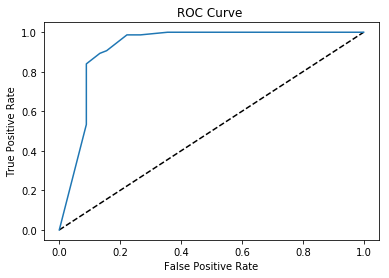

Area under the curve:  0.9219259259259259


In [31]:

#Choose the best model
Best = "Random Forest" # "SVC Linear"#"Logistic regression"
best = rf
best_prob = best.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, best_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label= Best)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ')
plt.show();
print("Area under the curve: ",roc_auc_score(y_test, best_prob))

In [32]:
# Cross validation
cv_scores = cross_val_score(best, X_train, y_train, cv=5,
scoring='roc_auc')
print(cv_scores)

[0.89795918 0.97755102 0.91088435 0.88214286 0.94571429]


## Interpretation
- SVC peforms well  with only 7 miscalssification
- False Negative has higher consequences !!!
- test split .25 random state = 0

###   Build a regression model for predicting radius_2 based on perimeter_1
	- the model should be able to quantify its prediction reliability, e.g. density estimates, etc. (please do not just use the outputted R^2 or confidence interval estimates of typical linear regression packages fitting results)
	- prepare a visualization that illustrates possible prediction uncertainties

In [22]:
df.head()

,radius_0,texture_0,radius_1,texture_1,perimeter_1,radius_2,texture_2,perimeter_2,age,cancer_type
0,19.858394,27.204437,22.683290,32.802578,119.523841,21.477052,27.307087,82.366936,44,0
1,14.182069,15.754730,14.043753,30.094704,94.911073,15.012329,17.855131,103.078286,59,1
2,25.380268,21.291553,23.852166,46.237931,94.086379,28.563252,21.097153,143.367792,37,0
3,11.835961,17.820702,11.260258,44.805167,94.086379,12.082749,16.499237,65.920413,51,1
4,14.875600,17.534187,14.380683,26.190447,89.712492,12.930685,19.856687,108.380754,21,1


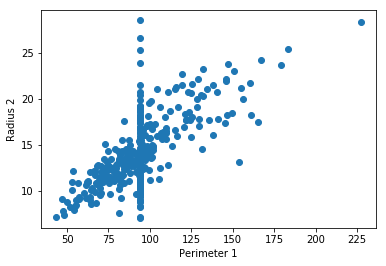

In [23]:
plt.scatter(df.perimeter_1, df.radius_2)
plt.ylabel('Radius 2')
plt.xlabel('Perimeter 1')
plt.show();

In [24]:
formula = 'radius_2 ~ perimeter_1'
# create a fitted model with all three features
lm = smf.ols(formula=formula, data = df).fit()
lm.summary()#lm.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               radius_2   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     399.8
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           5.48e-62
Time:                        22:26:08   Log-Likelihood:                -951.22
No. Observations:                 398   AIC:                             1906.
Df Residuals:                     396   BIC:                             1914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.8920      0.578      5.006      0.000       1.756       4.028
perimeter_1     0.1195      0.006     19.994      0.000       0.108       0.131
==============================================================================
Omnibus:                       91.681   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              343.664
Skew:                           0.976   Prob(JB):                     2.37e-75
Kurtosis:                       7.113   Cond. No.                         421.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""